In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloadin

True

In [ ]:
!pip install langdetect

In [ ]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import re
import nltk
import spacy
from sklearn import feature_extraction
import random
import langdetect
from bs4 import BeautifulSoup
from sklearn.ensemble import GradientBoostingClassifier
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import gensim
import gensim.downloader as gensim_api
from sklearn import feature_extraction, manifold
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
random.seed(7)

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/NLP_Phase 3/final_twitter_topic_lockdown.csv")
df2 = pd.read_csv("/content/drive/MyDrive/NLP_Phase 3/final_twitter_topic_masking_and_distancing.csv")
df3 = pd.read_csv("/content/drive/MyDrive/NLP_Phase 3/final_twitter_topic_vac.csv")

In [ ]:
df1.label.value_counts()

False    1157
True       43
Name: label, dtype: int64

In [ ]:
df2.label.value_counts()

False    953
True     247
Name: label, dtype: int64

In [ ]:
df3.label.value_counts()

True     698
False    502
Name: label, dtype: int64

In [ ]:
df3

,Unnamed: 0,text,label
0,0,Putin After Announcing #CovidVaccine #Russian ...,True
1,1,Courtesy: WA! #WhatsApp #COVID #CovidVaccine h...,True
2,2,4 of the vaccines Jared bought are expected to...,True
3,3,One day you will realize CDC Guidelines magica...,False
4,4,Im far from lying. Current CDC guidelines is ...,True
...,...,...,...
1195,1195,.Sprint To Develop A #COVIDVaccine – // https:...,True
1196,1196,Here in the U.S. some localities have brought ...,False
1197,1197,Sanitizer &amp; Mask Manufacturers After Russi...,True
1198,1198,We are following all CDC guidelines through a ...,False


In [ ]:
df3 = df3.drop("Unnamed: 0", axis = 1)

In [ ]:
df = df3

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
def text_preprocess(text, flag_stemm=bool, flag_lemm=bool, lst_stopwords=None):

  #remove html tags 
  soup = BeautifulSoup(text,'lxml')
  html_free = soup.get_text()
  
  # covert to lowercase and remove punctuations and charachters and strip
  text = re.sub(r'[^\w\s]',"",str(html_free).lower().strip())

  #tokenize
  txt = text.split()

  #remove stopwords
  if lst_stopwords is not None:
    txt = [word for word in txt if word not in lst_stopwords]

  #stemming
  if flag_stemm == True:
    ps = nltk.stem.porter.PorterStemmer()
    txt = [ps.stem(word) for word in txt]

  #lemmatisation 
  if flag_lemm == True:
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    txt = [lem.lemmatize(word) for word in txt]

  #back to string
  text = " ".join(txt)
  return text

# Baseline model - Primary Dataset

In [ ]:
df_base = df.copy()
df_base["text"] = df_base["text"].apply(lambda x: text_preprocess(x, False, False, lst_stopwords))

In [ ]:
df_base

,text,label
0,putin announcing covidvaccine russian httpstco...,True
1,courtesy wa whatsapp covid covidvaccine httpst...,True
2,4 vaccines jared bought expected fail trump re...,True
3,one day realize cdc guidelines magically align...,False
4,im far lying current cdc guidelines wearing ma...,True
...,...,...
1195,sprint develop covidvaccine httpstco8mp0d05mqn,True
1196,us localities brought back mask mandates sever...,False
1197,sanitizer mask manufacturers russian vaccine a...,True
1198,following cdc guidelines combination regular h...,False


In [ ]:
x_base = df_base["text"]
y_base = df_base["label"]

In [ ]:
x_train_bs, x_test_bs, y_train_bs, y_test_bs = train_test_split(x_base, y_base, test_size = 0.2) 

In [ ]:
base_tfidf = TfidfVectorizer()
x_train_bs = base_tfidf.fit_transform(x_train_bs)

In [ ]:
x_test_bs = base_tfidf.transform(x_test_bs)

In [ ]:
gbc_bs = GradientBoostingClassifier()
model1_bs = gbc_bs.fit(x_train_bs,y_train_bs)
pred_1_bs = model1_bs.predict(x_test_bs)
print("Accuracy is: ", accuracy_score(y_test_bs,pred_1_bs))
print("Classification report:", classification_report(y_test_bs, pred_1_bs))

Accuracy is:  0.8875
Classification report:               precision    recall  f1-score   support

       False       0.83      0.91      0.87        99
        True       0.93      0.87      0.90       141

    accuracy                           0.89       240
   macro avg       0.88      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240



# Baseline Model - Secondary Dataset

In [ ]:
df_secondary = pd.read_csv("/content/drive/MyDrive/NLP_Phase 3/final_change_vaccination.csv")
df_secondary = df_secondary.drop("Unnamed: 0", axis=1)

In [ ]:
df_secondary["text"] = df_secondary["text"].apply(lambda x: text_preprocess(x, False, False, lst_stopwords))

x_secondary = df_secondary["text"]
y_secondary = df_secondary["label"]

secondary_tfidf = TfidfVectorizer()
x_secondary = base_tfidf.transform(x_secondary)


pred_secondary = model1_bs.predict(x_secondary)
print("Accuracy is: ", accuracy_score(y_secondary,pred_secondary))
print("Classification report:", classification_report(y_secondary, pred_secondary))

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Accuracy is:  0.964
Classification report:               precision    recall  f1-score   support

       False       0.98      0.98      0.98      1463
        True       0.31      0.38      0.34        37

    accuracy                           0.96      1500
   macro avg       0.65      0.68      0.66      1500
weighted avg       0.97      0.96      0.97      1500



# Feature Engineering and Model Training - Primary Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Phase 3/final_twitter_topic_vac.csv")
df = df.drop("Unnamed: 0", axis = 1)

In [ ]:
df["lang"] = df["text"].apply(lambda x: langdetect.detect(x) if x.strip() !=""else"")

In [ ]:
df["text_clean"] = df["text"].apply(lambda x: text_preprocess(x, False, True, lst_stopwords))

In [ ]:
df

,text,label,lang,text_clean
0,Putin After Announcing #CovidVaccine #Russian ...,True,en,putin announcing covidvaccine russian httpstco...
1,Courtesy: WA! #WhatsApp #COVID #CovidVaccine h...,True,en,courtesy wa whatsapp covid covidvaccine httpst...
2,4 of the vaccines Jared bought are expected to...,True,en,4 vaccine jared bought expected fail trump ref...
3,One day you will realize CDC Guidelines magica...,False,en,one day realize cdc guideline magically aligne...
4,Im far from lying. Current CDC guidelines is ...,True,en,im far lying current cdc guideline wearing mas...
...,...,...,...,...
1195,.Sprint To Develop A #COVIDVaccine – // https:...,True,en,sprint develop covidvaccine httpstco8mp0d05mqn
1196,Here in the U.S. some localities have brought ...,False,en,u locality brought back mask mandate several r...
1197,Sanitizer &amp; Mask Manufacturers After Russi...,True,en,sanitizer mask manufacturer russian vaccine an...
1198,We are following all CDC guidelines through a ...,False,en,following cdc guideline combination regular ha...


In [ ]:
df["word_count"] = df["text"].apply(lambda x: len(str(x).split(" ")))
df["char_count"] = df["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df["sentence_count"] = df["text"].apply(lambda x: len(str(x).split(".")))
df["avg_word_length"] = df["char_count"] / df["word_count"]
df["avg_sen_len"] = df["word_count"] / df["sentence_count"]
df.head()

,text,label,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len
0,Putin After Announcing #CovidVaccine #Russian ...,True,en,putin announcing covidvaccine russian httpstco...,6,64,2,10.666667,3.0
1,Courtesy: WA! #WhatsApp #COVID #CovidVaccine h...,True,en,courtesy wa whatsapp covid covidvaccine httpst...,6,63,2,10.500000,3.0
2,4 of the vaccines Jared bought are expected to...,True,en,4 vaccine jared bought expected fail trump ref...,18,96,2,5.333333,9.0
3,One day you will realize CDC Guidelines magica...,False,en,one day realize cdc guideline magically aligne...,13,74,1,5.692308,13.0
4,Im far from lying. Current CDC guidelines is ...,True,en,im far lying current cdc guideline wearing mas...,21,93,3,4.428571,7.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

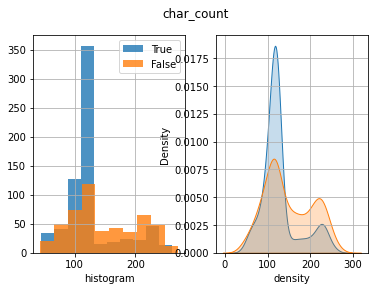

In [ ]:
x, y = "char_count", "label"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in df[y].unique():
    sns.distplot(df[df[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(df[df[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(df[y].unique())
ax[1].grid(True)
plt.show()

In [ ]:
sd = SentimentIntensityAnalyzer()

In [ ]:
df["scores"] = df["text"].apply(lambda x : sd.polarity_scores(x))
df.head()

,text,label,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,scores
0,Putin After Announcing #CovidVaccine #Russian ...,True,en,putin announcing covidvaccine russian httpstco...,6,64,2,10.666667,3.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Courtesy: WA! #WhatsApp #COVID #CovidVaccine h...,True,en,courtesy wa whatsapp covid covidvaccine httpst...,6,63,2,10.500000,3.0,"{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'comp..."
2,4 of the vaccines Jared bought are expected to...,True,en,4 vaccine jared bought expected fail trump ref...,18,96,2,5.333333,9.0,"{'neg': 0.169, 'neu': 0.725, 'pos': 0.106, 'co..."
3,One day you will realize CDC Guidelines magica...,False,en,one day realize cdc guideline magically aligne...,13,74,1,5.692308,13.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Im far from lying. Current CDC guidelines is ...,True,en,im far lying current cdc guideline wearing mas...,21,93,3,4.428571,7.0,"{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'comp..."


In [ ]:
df["compund_scores"] = df["scores"].apply(lambda score_dict: score_dict["compound"])

In [ ]:
df['compound'] = df['compund_scores'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [ ]:
colu = ["scores", "compund_scores"]
df = df.drop(colu, axis = 1)

In [ ]:
df

,text,label,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,compound
0,Putin After Announcing #CovidVaccine #Russian ...,True,en,putin announcing covidvaccine russian httpstco...,6,64,2,10.666667,3.000000,pos
1,Courtesy: WA! #WhatsApp #COVID #CovidVaccine h...,True,en,courtesy wa whatsapp covid covidvaccine httpst...,6,63,2,10.500000,3.000000,pos
2,4 of the vaccines Jared bought are expected to...,True,en,4 vaccine jared bought expected fail trump ref...,18,96,2,5.333333,9.000000,neg
3,One day you will realize CDC Guidelines magica...,False,en,one day realize cdc guideline magically aligne...,13,74,1,5.692308,13.000000,pos
4,Im far from lying. Current CDC guidelines is ...,True,en,im far lying current cdc guideline wearing mas...,21,93,3,4.428571,7.000000,neg
...,...,...,...,...,...,...,...,...,...,...
1195,.Sprint To Develop A #COVIDVaccine – // https:...,True,en,sprint develop covidvaccine httpstco8mp0d05mqn,8,56,3,7.000000,2.666667,pos
1196,Here in the U.S. some localities have brought ...,False,en,u locality brought back mask mandate several r...,41,233,7,5.682927,5.857143,pos
1197,Sanitizer &amp; Mask Manufacturers After Russi...,True,en,sanitizer mask manufacturer russian vaccine an...,11,125,6,11.363636,1.833333,pos
1198,We are following all CDC guidelines through a ...,False,en,following cdc guideline combination regular ha...,24,150,2,6.250000,12.000000,pos


In [ ]:
nlp = gensim_api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
word = "vaccination"
nlp[word]

array([ 0.068862 ,  0.3997   ,  0.069505 , -0.087973 ,  0.72912  ,
        0.51783  , -0.18252  ,  0.19091  , -0.37172  , -0.51783  ,
        0.18338  ,  0.42439  , -0.1366   , -0.55169  , -0.37998  ,
        0.10907  ,  0.10714  , -1.0277   ,  0.016062 , -1.081    ,
        0.030687 , -0.25409  ,  0.067951 , -0.35212  ,  0.37797  ,
        0.1362   ,  0.33063  , -0.16605  ,  0.057182 , -0.34556  ,
       -0.34894  ,  0.083091 ,  0.20966  ,  0.021464 ,  0.78717  ,
        0.24676  , -0.68759  , -0.1435   , -0.14255  , -0.17935  ,
       -0.065061 , -0.086298 ,  0.10953  , -0.91782  , -0.32268  ,
        0.020389 ,  0.4764   , -0.6329   , -0.050503 , -0.51115  ,
       -0.23036  ,  0.33326  ,  0.23593  , -0.015433 , -0.063779 ,
        0.090831 ,  0.47312  , -0.33403  , -0.74086  ,  0.48156  ,
       -0.48871  ,  0.50478  , -0.27003  , -0.034575 , -0.32901  ,
        0.066225 ,  0.6891   , -0.78962  , -0.86523  ,  0.24805  ,
        0.14811  ,  0.1391   ,  0.74245  ,  0.11823  ,  0.6616

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Text(5, 2, 'vaccination')

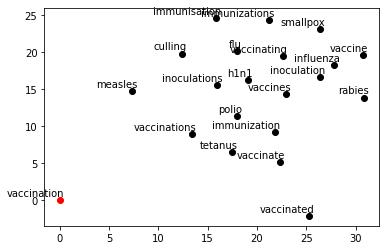

In [ ]:
## find closest vectors
labels, X, x, y = [], [], [], []
for t in nlp.most_similar(word, topn=20):
    X.append(nlp[t[0]])
    labels.append(t[0])
## reduce dimensions
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
new_values = pca.fit_transform(X)
for value in new_values:
    x.append(value[0])
    y.append(value[1])
## plot
fig = plt.figure()
for i in range(len(x)):
    plt.scatter(x[i], y[i], c="black")
    plt.annotate(labels[i], xy=(x[i],y[i]), xytext=(5,2), 
               textcoords='offset points', ha='right', va='bottom')
## add center
plt.scatter(x=0, y=0, c="red")
plt.annotate(word, xy=(0,0), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')

In [ ]:
df

,text,label,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,compound
0,Putin After Announcing #CovidVaccine #Russian ...,True,en,putin announcing covidvaccine russian httpstco...,6,64,2,10.666667,3.000000,pos
1,Courtesy: WA! #WhatsApp #COVID #CovidVaccine h...,True,en,courtesy wa whatsapp covid covidvaccine httpst...,6,63,2,10.500000,3.000000,pos
2,4 of the vaccines Jared bought are expected to...,True,en,4 vaccine jared bought expected fail trump ref...,18,96,2,5.333333,9.000000,neg
3,One day you will realize CDC Guidelines magica...,False,en,one day realize cdc guideline magically aligne...,13,74,1,5.692308,13.000000,pos
4,Im far from lying. Current CDC guidelines is ...,True,en,im far lying current cdc guideline wearing mas...,21,93,3,4.428571,7.000000,neg
...,...,...,...,...,...,...,...,...,...,...
1195,.Sprint To Develop A #COVIDVaccine – // https:...,True,en,sprint develop covidvaccine httpstco8mp0d05mqn,8,56,3,7.000000,2.666667,pos
1196,Here in the U.S. some localities have brought ...,False,en,u locality brought back mask mandate several r...,41,233,7,5.682927,5.857143,pos
1197,Sanitizer &amp; Mask Manufacturers After Russi...,True,en,sanitizer mask manufacturer russian vaccine an...,11,125,6,11.363636,1.833333,pos
1198,We are following all CDC guidelines through a ...,False,en,following cdc guideline combination regular ha...,24,150,2,6.250000,12.000000,pos


In [ ]:
X = df.iloc[:,3:9]
y = df.iloc[:,1]

In [ ]:
print(X.shape, y.shape)

(1200, 6) (1200,)


In [ ]:
X.head()

,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len
0,putin announcing covidvaccine russian httpstco...,6,64,2,10.666667,3.0
1,courtesy wa whatsapp covid covidvaccine httpst...,6,63,2,10.500000,3.0
2,4 vaccine jared bought expected fail trump ref...,18,96,2,5.333333,9.0
3,one day realize cdc guideline magically aligne...,13,74,1,5.692308,13.0
4,im far lying current cdc guideline wearing mas...,21,93,3,4.428571,7.0


In [ ]:
X_dummy = pd.get_dummies(df.compound, prefix="Sentiment",drop_first=True)
X = X.join(X_dummy)

In [ ]:
X

,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,Sentiment_pos
0,putin announcing covidvaccine russian httpstco...,6,64,2,10.666667,3.000000,1
1,courtesy wa whatsapp covid covidvaccine httpst...,6,63,2,10.500000,3.000000,1
2,4 vaccine jared bought expected fail trump ref...,18,96,2,5.333333,9.000000,0
3,one day realize cdc guideline magically aligne...,13,74,1,5.692308,13.000000,1
4,im far lying current cdc guideline wearing mas...,21,93,3,4.428571,7.000000,0
...,...,...,...,...,...,...,...
1195,sprint develop covidvaccine httpstco8mp0d05mqn,8,56,3,7.000000,2.666667,1
1196,u locality brought back mask mandate several r...,41,233,7,5.682927,5.857143,1
1197,sanitizer mask manufacturer russian vaccine an...,11,125,6,11.363636,1.833333,1
1198,following cdc guideline combination regular ha...,24,150,2,6.250000,12.000000,1


In [ ]:
X.iloc[:,1:6] = normalize(X.iloc[:,1:6])

In [ ]:
X

,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,Sentiment_pos
0,putin announcing covidvaccine russian httpstco...,0.091941,0.980703,0.030647,0.163450,0.045970,1
1,courtesy wa whatsapp covid covidvaccine httpst...,0.093383,0.980522,0.031128,0.163420,0.046692,1
2,4 vaccine jared bought expected fail trump ref...,0.183202,0.977080,0.020356,0.054282,0.091601,0
3,one day realize cdc guideline magically aligne...,0.170005,0.967721,0.013077,0.074440,0.170005,1
4,im far lying current cdc guideline wearing mas...,0.219327,0.971303,0.031332,0.046253,0.073109,0
...,...,...,...,...,...,...,...
1195,sprint develop covidvaccine httpstco8mp0d05mqn,0.140004,0.980029,0.052502,0.122504,0.046668,1
1196,u locality brought back mask mandate several r...,0.173124,0.983853,0.029558,0.023996,0.024732,1
1197,sanitizer mask manufacturer russian vaccine an...,0.087196,0.990863,0.047561,0.090078,0.014533,1
1198,following cdc guideline combination regular ha...,0.157354,0.983463,0.013113,0.040978,0.078677,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
x_train

,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,Sentiment_pos
903,point medium govt lie abt number report 100 pp...,0.218416,0.974471,0.021002,0.018740,0.043683,1
612,johnson johnson coronavirus vaccine fourth beg...,0.139668,0.985892,0.016432,0.057994,0.069834,1
527,probably observing cdc guideline man get one p...,0.234965,0.964169,0.016205,0.033247,0.117483,0
686,shouldnt need go digging find thing release da...,0.160523,0.983203,0.030098,0.061450,0.053508,1
217,clearly dont watch news tucker carlson news cd...,0.211855,0.975646,0.027876,0.025675,0.042371,1
...,...,...,...,...,...,...,...
567,coronavirusvaccine covidvaccine russianvaccine...,0.075858,0.986149,0.021674,0.140878,0.037929,1
299,reason hasnt lived expectation number people t...,0.215686,0.973351,0.016591,0.024958,0.071895,1
242,india hunt covid19 vaccine take look report co...,0.140793,0.985553,0.043321,0.075812,0.035198,1
404,wish 1 law firm would sign go agst govt cdc gu...,0.208043,0.976897,0.027136,0.021237,0.034674,1


In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(960, 7) (240, 7) (960,) (240,)


In [ ]:
tfidf = TfidfVectorizer()
x_train_tf= tfidf.fit_transform(x_train["text_clean"]).toarray()

In [ ]:
x_test_tf = tfidf.transform(x_test).toarray()

In [ ]:
x_train = x_train.drop("text_clean", axis=1)
x_test = x_test.drop("text_clean",axis=1)

In [ ]:
x_train.reset_index(inplace=True)
x_test.reset_index(inplace=True)

In [ ]:
x_train = x_train.drop("index",axis=1)

In [ ]:
x_test = x_test.drop("index",axis=1)

In [ ]:
x_train_tf = pd.DataFrame(x_train_tf)
x_test_tf = pd.DataFrame(x_test_tf)

In [ ]:
x_train = x_train.join(x_train_tf)

In [ ]:
x_train

,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,Sentiment_pos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,...,4476,4477,4478,4479,4480,4481,4482,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502,4503,4504,4505,4506,4507,4508,4509,4510,4511,4512,4513,4514,4515
0,0.218416,0.974471,0.021002,0.018740,0.043683,1,0.0,0.0,0.0,0.0,0.0,0.167384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.139668,0.985892,0.016432,0.057994,0.069834,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.234965,0.964169,0.016205,0.033247,0.117483,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.160523,0.983203,0.030098,0.061450,0.053508,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.211855,0.975646,0.027876,0.025675,0.042371,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.075858,0.986149,0.021674,0.140878,0.037929,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956,0.215686,0.973351,0.016591,0.024958,0.071895,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
957,0.140793,0.985553,0.043321,0.075812,0.035198,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
958,0.208043,0.976897,0.027136,0.021237,0.034674,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.145681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_test = x_test.join(x_test_tf)

In [ ]:
xgb = XGBClassifier()
model = xgb.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)

In [ ]:
print("Accuracy is: ", accuracy_score(y_test, pred))

Accuracy is:  0.4083333333333333


In [ ]:
print("Classification Report", classification_report(y_test, pred))

Classification Report               precision    recall  f1-score   support

       False       0.41      1.00      0.58        98
        True       0.00      0.00      0.00       142

    accuracy                           0.41       240
   macro avg       0.20      0.50      0.29       240
weighted avg       0.17      0.41      0.24       240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gbc = GradientBoostingClassifier()
model1 = gbc.fit(x_train,y_train)
pred_1 = model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,pred_1))
print("Classification Report is: ",classification_report(y_test,pred_1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy is:  0.4083333333333333
Classification Report is:                precision    recall  f1-score   support

       False       0.41      1.00      0.58        98
        True       0.00      0.00      0.00       142

    accuracy                           0.41       240
   macro avg       0.20      0.50      0.29       240
weighted avg       0.17      0.41      0.24       240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feature Engineering and Model Training - Secondary Dataset

In [ ]:
df_s2 = pd.read_csv("/content/drive/MyDrive/NLP_Phase 3/final_change_vaccination.csv")
df_s2 = df_s2.drop("Unnamed: 0", axis=1)

In [ ]:
df_s2

,text,label
0,Language Education in the Time of COVID-19,False
1,COVID-19 Test Kits,False
2,COVID 19 IN PRISON,False
3,Get Waled Home,False
4,Make pass/fail available for Mississippi State...,False
...,...,...
1495,Null and void the Premier League,False
1496,Free public transport for NHS staff to accompa...,False
1497,PM please give immediate COVID Insurance cover...,False
1498,SAY NO TO OSHA PROPOSED PERMANENT RULE,False


In [ ]:
df_s2["text_clean"] = df_s2["text"].apply(lambda x: text_preprocess(x, False, True, lst_stopwords))

df_s2["word_count"] = df_s2["text"].apply(lambda x: len(str(x).split(" ")))
df_s2["char_count"] = df_s2["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df_s2["sentence_count"] = df_s2["text"].apply(lambda x: len(str(x).split(".")))
df_s2["avg_word_length"] = df_s2["char_count"] / df_s2["word_count"]
df_s2["avg_sen_len"] = df_s2["word_count"] / df_s2["sentence_count"]

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [ ]:
sd1 = SentimentIntensityAnalyzer()
df_s2["scores"] = df_s2["text"].apply(lambda x : sd1.polarity_scores(x))
df_s2["compund_scores"] = df_s2["scores"].apply(lambda score_dict: score_dict["compound"])
df_s2['compound'] = df_s2['compund_scores'].apply(lambda c: 'pos' if c >=0 else 'neg')
colu = ["scores", "compund_scores"]
df_s2 = df_s2.drop(colu, axis = 1)

In [ ]:
X_dummy_se = pd.get_dummies(df_s2.compound, prefix="Sentiment",drop_first=True)
df_s2 = df_s2.join(X_dummy_se)

df_s2

,text,label,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,compound,Sentiment_pos
0,Language Education in the Time of COVID-19,False,language education time covid19,7,36,1,5.142857,7.0,pos,1
1,COVID-19 Test Kits,False,covid19 test kit,3,16,1,5.333333,3.0,pos,1
2,COVID 19 IN PRISON,False,covid 19 prison,4,15,1,3.750000,4.0,neg,0
3,Get Waled Home,False,get waled home,3,12,1,4.000000,3.0,pos,1
4,Make pass/fail available for Mississippi State...,False,make passfail available mississippi state stud...,12,77,2,6.416667,6.0,pos,1
...,...,...,...,...,...,...,...,...,...,...
1495,Null and void the Premier League,False,null void premier league,6,27,1,4.500000,6.0,pos,1
1496,Free public transport for NHS staff to accompa...,False,free public transport nh staff accompany 1 pay...,11,50,1,4.545455,11.0,pos,1
1497,PM please give immediate COVID Insurance cover...,False,pm please give immediate covid insurance cover...,11,53,1,4.818182,11.0,pos,1
1498,SAY NO TO OSHA PROPOSED PERMANENT RULE,False,say osha proposed permanent rule,7,32,1,4.571429,7.0,neg,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

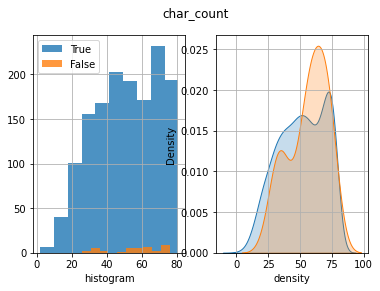

In [ ]:
x, y = "char_count", "label"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in df_s2[y].unique():
    sns.distplot(df_s2[df_s2[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(df_s2[df_s2[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(df[y].unique())
ax[1].grid(True)
plt.show()

In [ ]:
df_s2 = df_s2.drop("compound", axis=1)

In [ ]:
df_s2

,text,label,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,Sentiment_pos
0,Language Education in the Time of COVID-19,False,language education time covid19,7,36,1,5.142857,7.0,1
1,COVID-19 Test Kits,False,covid19 test kit,3,16,1,5.333333,3.0,1
2,COVID 19 IN PRISON,False,covid 19 prison,4,15,1,3.750000,4.0,0
3,Get Waled Home,False,get waled home,3,12,1,4.000000,3.0,1
4,Make pass/fail available for Mississippi State...,False,make passfail available mississippi state stud...,12,77,2,6.416667,6.0,1
...,...,...,...,...,...,...,...,...,...
1495,Null and void the Premier League,False,null void premier league,6,27,1,4.500000,6.0,1
1496,Free public transport for NHS staff to accompa...,False,free public transport nh staff accompany 1 pay...,11,50,1,4.545455,11.0,1
1497,PM please give immediate COVID Insurance cover...,False,pm please give immediate covid insurance cover...,11,53,1,4.818182,11.0,1
1498,SAY NO TO OSHA PROPOSED PERMANENT RULE,False,say osha proposed permanent rule,7,32,1,4.571429,7.0,0


In [ ]:
X_se = df_s2.iloc[:,2:]
y_se = df_s2["label"]

In [ ]:
X_se

,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,Sentiment_pos
0,language education time covid19,7,36,1,5.142857,7.0,1
1,covid19 test kit,3,16,1,5.333333,3.0,1
2,covid 19 prison,4,15,1,3.750000,4.0,0
3,get waled home,3,12,1,4.000000,3.0,1
4,make passfail available mississippi state stud...,12,77,2,6.416667,6.0,1
...,...,...,...,...,...,...,...
1495,null void premier league,6,27,1,4.500000,6.0,1
1496,free public transport nh staff accompany 1 pay...,11,50,1,4.545455,11.0,1
1497,pm please give immediate covid insurance cover...,11,53,1,4.818182,11.0,1
1498,say osha proposed permanent rule,7,32,1,4.571429,7.0,0


In [ ]:
X_se.iloc[:,1:6] = normalize(X_se.iloc[:,1:6])

In [ ]:
X_se_11= tfidf.transform(X_se["text_clean"]).toarray()
X_se_11 = pd.DataFrame(X_se_11)

In [ ]:
X_se = X_se.join(X_se_11)

In [ ]:
X_se

,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,Sentiment_pos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,...,4476,4477,4478,4479,4480,4481,4482,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502,4503,4504,4505,4506,4507,4508,4509,4510,4511,4512,4513,4514,4515
0,language education time covid19,0.185666,0.954854,0.026524,0.136408,0.185666,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,covid19 test kit,0.172219,0.918503,0.057406,0.306168,0.172219,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,covid 19 prison,0.242508,0.909404,0.060627,0.227351,0.242508,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.860876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,get waled home,0.224231,0.896922,0.074744,0.298974,0.224231,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,make passfail available mississippi state stud...,0.152967,0.981535,0.025494,0.081795,0.076483,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,null void premier league,0.209242,0.941590,0.034874,0.156932,0.209242,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,free public transport nh staff accompany 1 pay...,0.209243,0.951103,0.019022,0.086464,0.209243,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,pm please give immediate covid insurance cover...,0.198360,0.955736,0.018033,0.086885,0.198360,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,say osha proposed permanent rule,0.206969,0.946142,0.029567,0.135163,0.206969,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
X_se = X_se.fillna(X_se.median())

In [ ]:
X_se = X_se.drop("text_clean", axis=1)

In [ ]:
X_se

,word_count,char_count,sentence_count,avg_word_length,avg_sen_len,Sentiment_pos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,...,4476,4477,4478,4479,4480,4481,4482,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502,4503,4504,4505,4506,4507,4508,4509,4510,4511,4512,4513,4514,4515
0,0.185666,0.954854,0.026524,0.136408,0.185666,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.172219,0.918503,0.057406,0.306168,0.172219,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.242508,0.909404,0.060627,0.227351,0.242508,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.860876,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.224231,0.896922,0.074744,0.298974,0.224231,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.152967,0.981535,0.025494,0.081795,0.076483,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.209242,0.941590,0.034874,0.156932,0.209242,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.209243,0.951103,0.019022,0.086464,0.209243,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.198360,0.955736,0.018033,0.086885,0.198360,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,0.206969,0.946142,0.029567,0.135163,0.206969,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pred_se_feature = model.predict(X_se)

In [ ]:
print("Accuracy is: ", accuracy_score(y_se, pred_se_feature))
print("Classification Report is: ", classification_report(y_se, pred_se_feature))

Accuracy is:  0.9793333333333333
Classification Report is:                precision    recall  f1-score   support

       False       0.98      0.99      0.99      1463
        True       0.64      0.38      0.47        37

    accuracy                           0.98      1500
   macro avg       0.81      0.69      0.73      1500
weighted avg       0.98      0.98      0.98      1500

